In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



In [110]:
data = pd.read_csv(r'C:\Users\Anushka\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [111]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [112]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [113]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

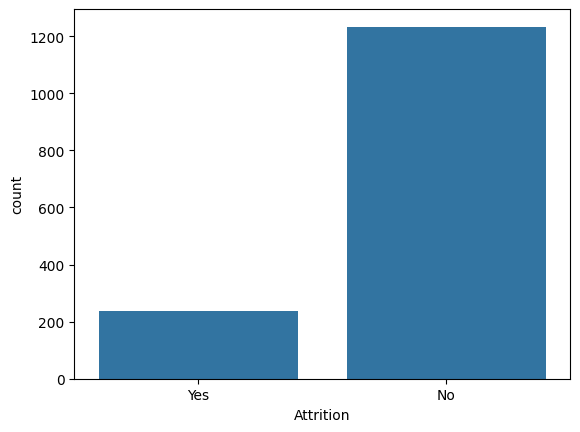

In [114]:
sns.countplot(x='Attrition', data=data)
plt.show()

In [115]:
data.bfill(inplace=True)

In [116]:
data_encoded = data.copy()

In [117]:
categorical_cols = data_encoded.select_dtypes(include=['object']).columns

In [118]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data_encoded[col] = label_encoders[col].fit_transform(data_encoded[col])

In [119]:
print(data_encoded.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

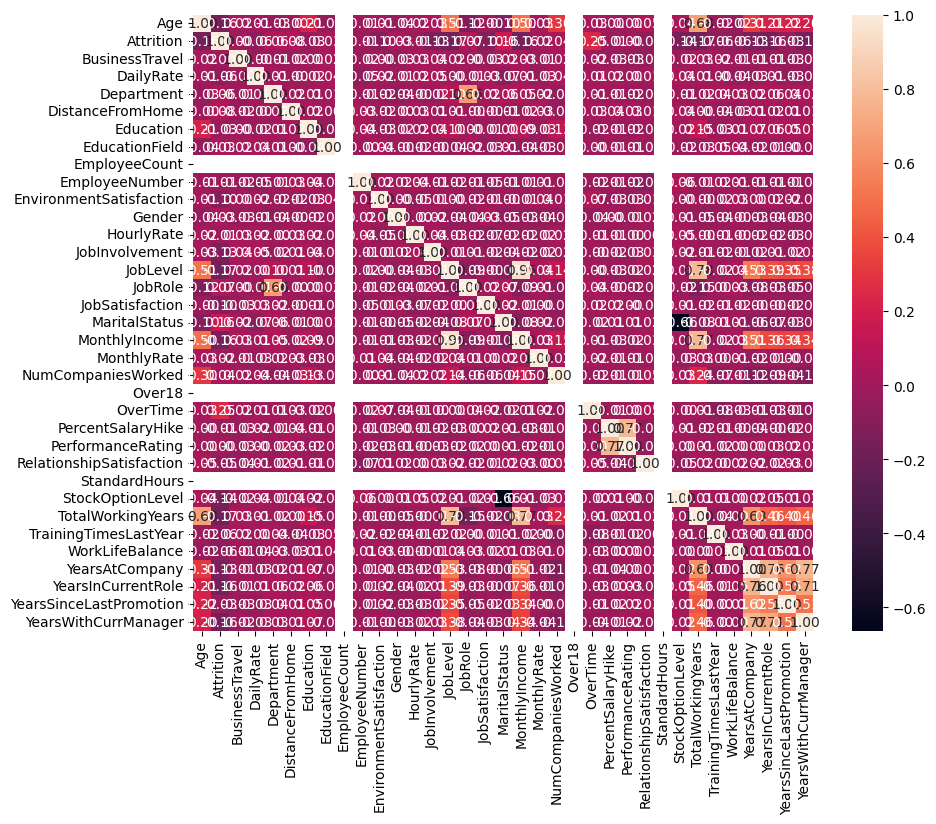

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, fmt='.2f')
plt.show()

In [121]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data = pd.get_dummies(data, drop_first=True)

In [122]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [126]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [127]:
y_pred = model.predict(X_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8684807256235828
Confusion Matrix:
[[378   2]
 [ 56   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441



In [129]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


In [130]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

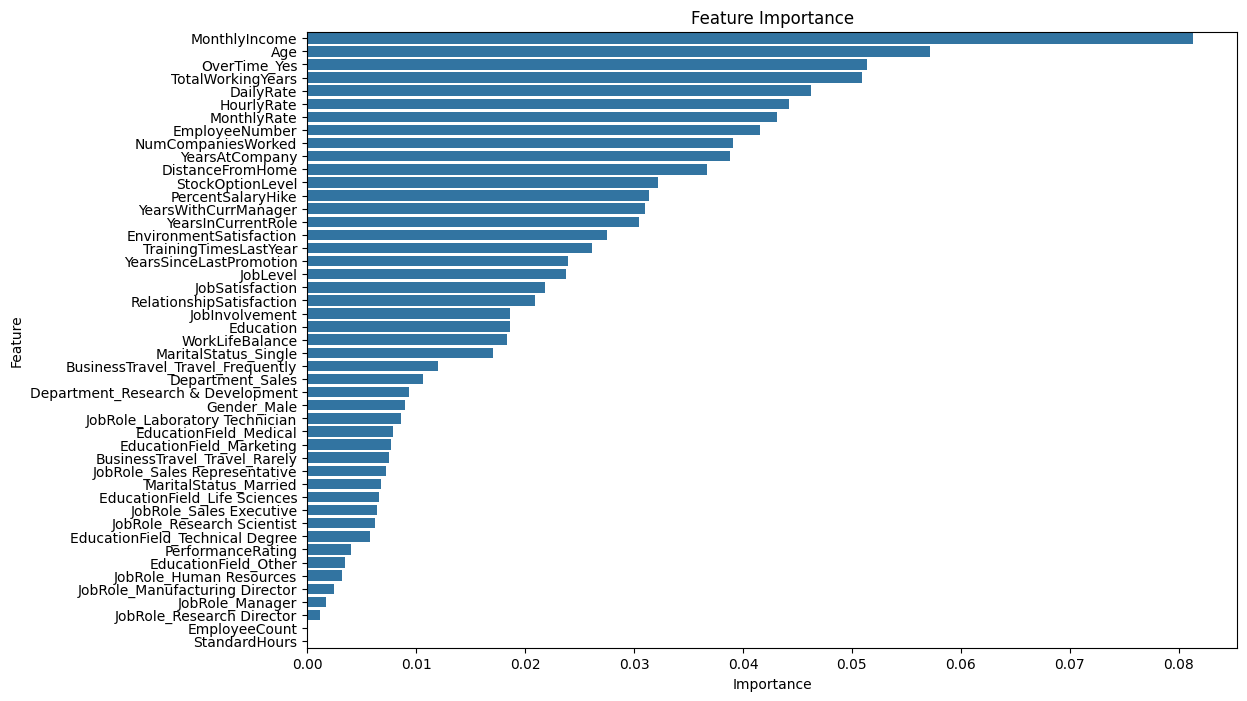

In [131]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [132]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [133]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [134]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [135]:
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [136]:
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [137]:
y_pred_best = best_model.predict(X_test)

In [138]:
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy (Best Model): {accuracy_best}')
print('Confusion Matrix (Best Model):')
print(conf_matrix_best)
print('Classification Report (Best Model):')
print(class_report_best)

Accuracy (Best Model): 0.873015873015873
Confusion Matrix (Best Model):
[[379   1]
 [ 55   6]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       380
           1       0.86      0.10      0.18        61

    accuracy                           0.87       441
   macro avg       0.87      0.55      0.55       441
weighted avg       0.87      0.87      0.83       441



In [139]:
joblib.dump(best_model, 'employee_attrition_model.pkl')

['employee_attrition_model.pkl']

In [140]:
loaded_model = joblib.load('employee_attrition_model.pkl')

In [141]:
y_pred = loaded_model.predict(X_test)

In [142]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [143]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[379   1]
 [ 55   6]]


In [144]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       380
           1       0.86      0.10      0.18        61

    accuracy                           0.87       441
   macro avg       0.87      0.55      0.55       441
weighted avg       0.87      0.87      0.83       441

